# 5. Statistics
- Statistics refers to the mathematics and techniques with which we understand data.
- It is a rich, enormous field, more suited to a shelf (or room) in a library rather than a chapter in a book

## Describing a Single Set of Data
- VP of Fundraising asks you for some sort of description of how many friends your members have.

In [1]:
from collections import Counter
# from linear_algebra import sum_of_squares, dot
import math
from operator import add

def dot(v, w): # 내적 
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [6]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,11,11,11,10,10,10,10,10,10,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [7]:
def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

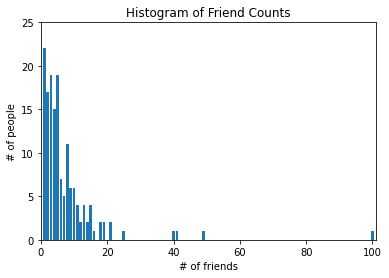

In [8]:
import matplotlib.pyplot as plt
make_friend_counts_histogram(plt)

- Unfortunately, this chart is still too difficult to slip into conversations.
- So you start generating some statistics.
- Probably the simplest statistic is simply the number of data points:

<b>min, max, smallest, largest</b>

In [9]:
num_points = len(num_friends) # 204

largest_value = max(num_friends) # 100
smallest_value = min(num_friends) # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49

print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )

num_points 155
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


### numpy version

In [10]:
import numpy as np

num_friends = np.array(num_friends)

num_points = num_friends.shape[0] # 204

largest_value = np.max(num_friends) # 100
smallest_value = np.min(num_friends) # 1

sorted_values = np.sort(num_friends)
smallest_value = sorted_values[0] # 1
second_smallest_value = sorted_values[1] # 1
second_largest_value = sorted_values[-2] # 49

print("num_points", len(num_friends))
print("largest value", max(num_friends))
print("smallest value", min(num_friends))
print("second_smallest_value", sorted_values[1])
print("second_largest_value", sorted_values[-2] )

num_friends = list(num_friends)

num_points 155
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


### Central Tendencies
- The median doesn’t depend on every value in your data.
- For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged.
- the mean is very sensitive to outliers in our data.
- If our friendliest user had 200 friends (instead of 100), then the mean would rise to 7.82, while the median would stay the same
- For example, the story is often told that in the mid-1980s, the major at the University of North Carolina with the highest average starting salary was geography, mostly on account of NBA star (and outlier) Michael Jordan.
- A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies. (The median represents the value less than which 50% of the data lies.)
- mode: most-common value

<b>mean(centroid), median(medoid), quantile, mode(frequent itemset)</b>

In [11]:
def mean(x): # 평균
     return sum(x) / len(x)

def median(v): # 중간값 
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x, p): # 비율 (퍼센트)
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x): # 최빈값
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [12]:
print("mean(num_friends)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))

mean(num_friends) 7.367741935483871
median(num_friends) 5
quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 2
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 15
mode(num_friends) [1]


<b>numpy version</b>

In [13]:
import numpy as np

# np.quantile is available from v1.16
# np.percentile uses percent instead of ratio
print("mean(num_friends)", np.mean(num_friends))
print("median(num_friends)", np.median(num_friends))
print("quantile(num_friends, 0.10)", np.percentile(num_friends, 10))
print("quantile(num_friends, 0.25)", np.percentile(num_friends, 25))
print("quantile(num_friends, 0.75)", np.percentile(num_friends, 75))
print("quantile(num_friends, 0.90)", np.percentile(num_friends, 90))
# mode using numpy will be a homework
print("mode(num_friends)", np.bincount(num_friends).argmax())

mean(num_friends) 7.367741935483871
median(num_friends) 5.0
quantile(num_friends, 0.10) 1.0
quantile(num_friends, 0.25) 2.5
quantile(num_friends, 0.75) 9.0
quantile(num_friends, 0.90) 14.599999999999994
mode(num_friends) 1


### Disperson(산포도)
- Dispersion refers to measures of how spread out our data is.
- <b>Range</b> is just the difference between the largest and smallest elements
- <b>variance</b>
- <b>Standard deviation</b>
- Both the range and the standard deviation have the same <b>outlier problem</b>
- <b>Interquartile_range</b>: the difference between the 75th percentile value and the 25th percentile value

In [15]:
# "range" already means something in Python, so we'll use a different name
def data_range(x):
    return max(x) - min(x)

def de_mean(x): # 평균으로부터 얼마나 떨어져 있는지 - 분포
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x): # 분산
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x): # 표준편차
     return math.sqrt(variance(x))

def interquartile_range(x): # 75% ~ 25%
     return quantile(x, 0.75) - quantile(x, 0.25)

In [16]:
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

data_range(num_friends) 99
variance(num_friends) 106.5197318810222
standard_deviation(num_friends) 10.320839688757024
interquartile_range(num_friends) 7


<b>numpy version</b>

In [17]:
num_friends = np.array(num_friends)
print("data_range(num_friends)", np.ptp(num_friends)) # peak to peak -> max ~ min
print("data_range(num_friends)", np.max(num_friends) - np.min(num_friends))
print("variance(num_friends)", np.var(num_friends, ddof=1))
print("standard_deviation(num_friends)", np.std(num_friends, ddof=1))
q75, q25 = np.percentile(num_friends, [75 ,25])
print("interquartile_range(num_friends)", q75 - q25)
num_friends = list(num_friends)

data_range(num_friends) 99
data_range(num_friends) 99
variance(num_friends) 106.5197318810222
standard_deviation(num_friends) 10.320839688757024
interquartile_range(num_friends) 6.5


## Boxplot
- it is very explanatory
- It shows the summary of data

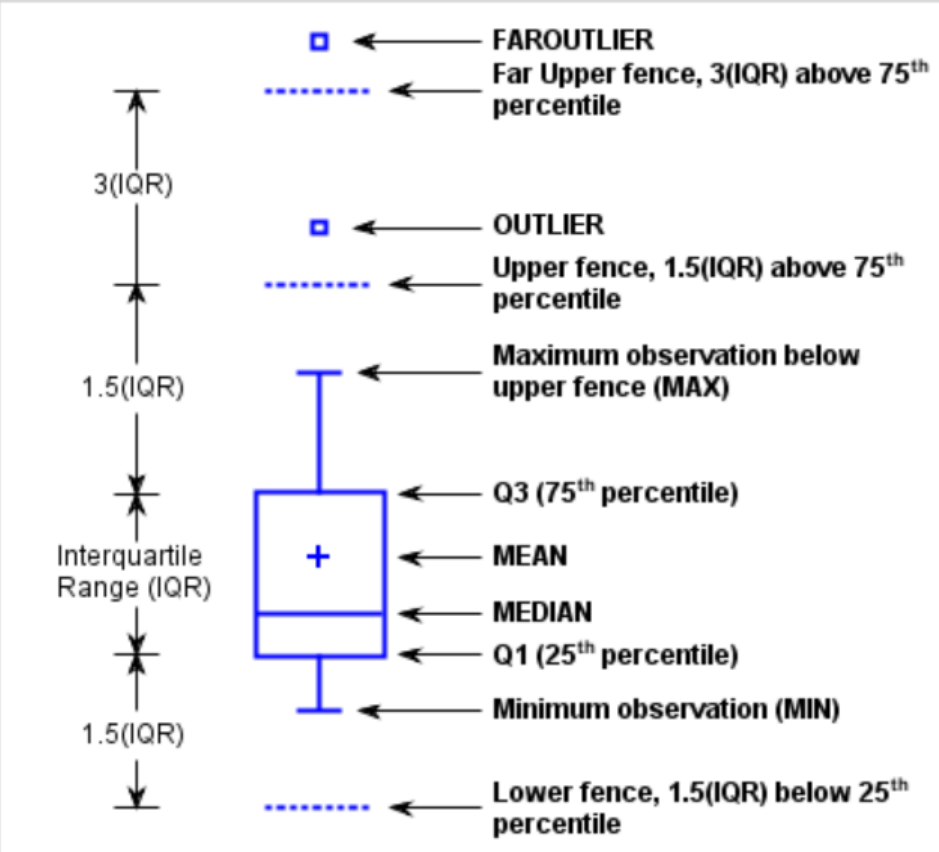

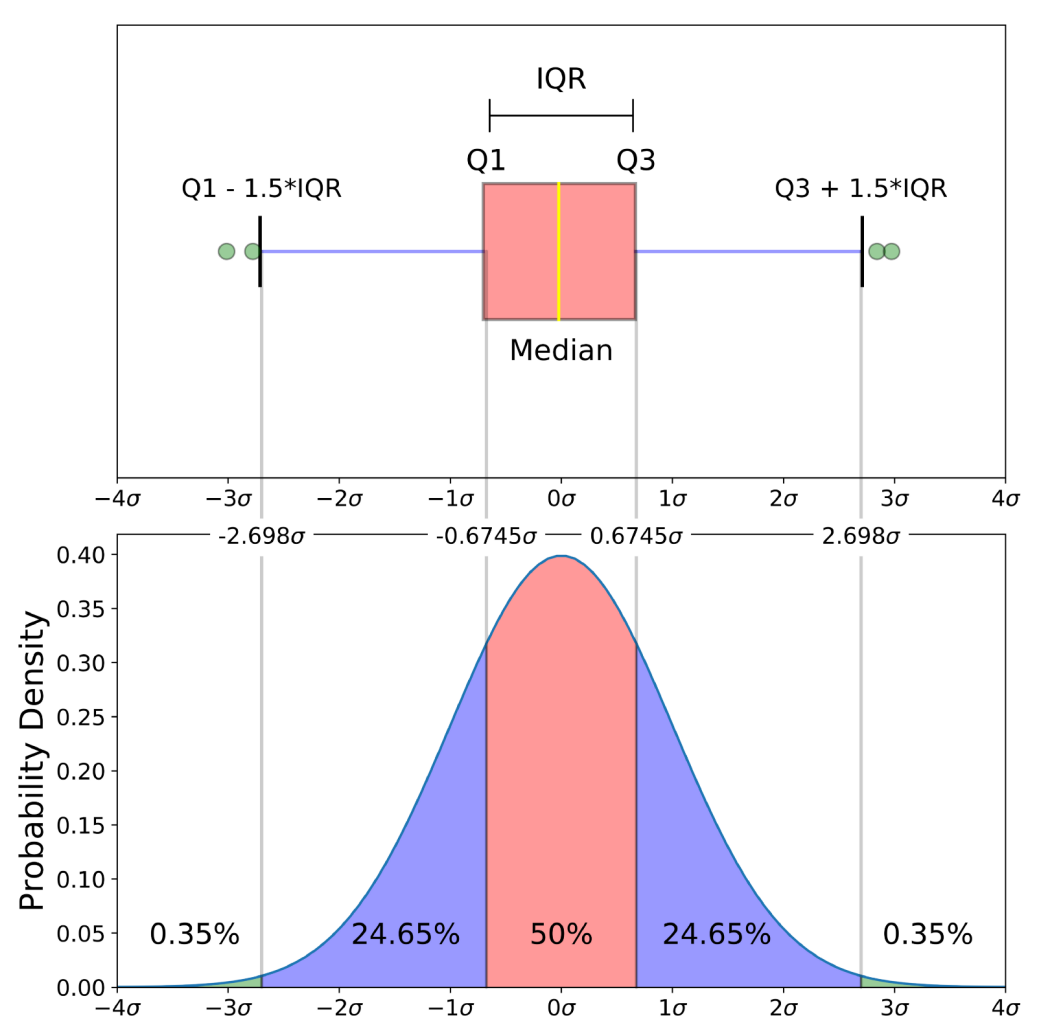

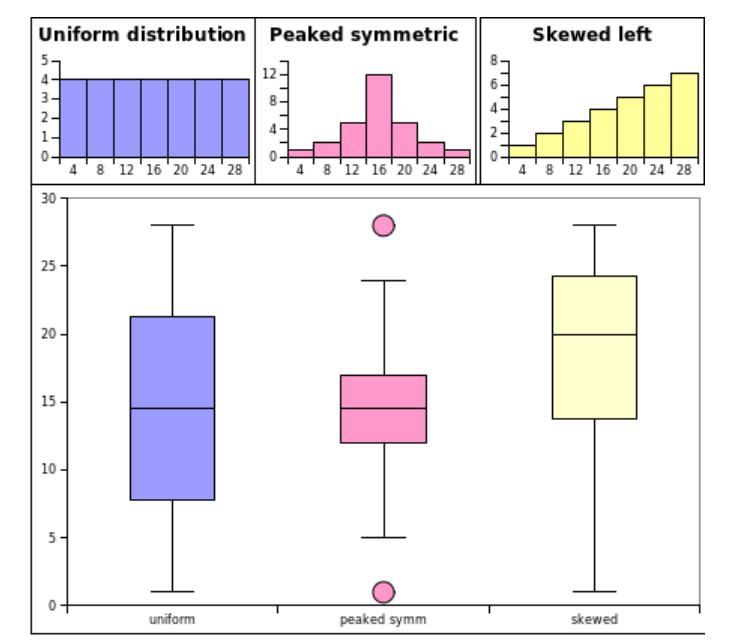

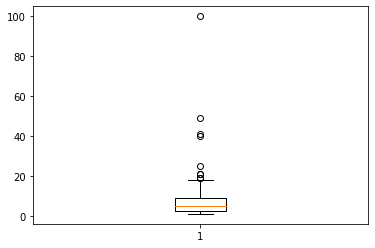

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(num_friends)
plt.show()

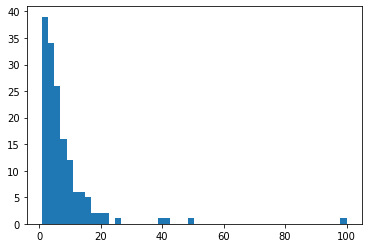

In [19]:
plt.hist(num_friends, bins=50)
plt.show()

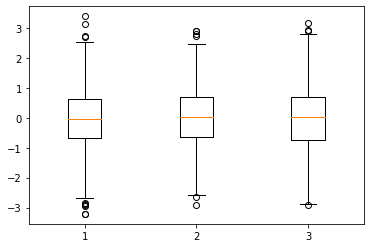

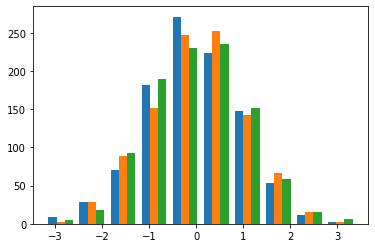

In [20]:
data = np.random.randn(1000,3)
plt.boxplot(data)
plt.show()
plt.hist(data, bins=10)
plt.show()

If we know the population mean, the standard deviation is given by

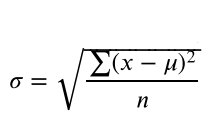

If we don’t know the population mean, we can use sample mean to calculate the standard deviation

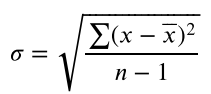

In [21]:
import numpy as np
print(np.std([1,2,3]))
print(np.std([1,2,3], ddof=1)) # provide degree of freedom
print(standard_deviation([1,2,3]))

0.816496580927726
1.0
1.0


## Correlation
- DataSciencester’s VP of Growth has a theory that <b>the amount of time people spend on the site</b> is related to <b>the number of friends they have on the site</b>, and she’s asked you to verify this.
- We’d like to investigate the relationship between these two metrics.